# Merge Sort
## Author: Timothy Proffitt
## CS 2500 (Algorithms) @ Missouri S&T

## Prerequisite Packages

We will use the numpy and matplotlib library in this notebook

In [1]:
# Install all the prerequisite packages from the Terminal
!pip install numpy
!pip install matplotlib

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy

## Merge Sort Functions

In [7]:
def mergeSort(A):                              #Easy to call function
  mergeSortRec(A, 0, len(A))
  return A

def mergeSortRec(seq, start, stop):            #Divide
  if start >= stop-1:
    return  
  middle = (start + stop) // 2
  mergeSortRec(seq, start, middle)
  mergeSortRec(seq, middle, stop)
  merge(seq, start, middle, stop)


def merge(seq, start, mid, stop):               #conquer
  lst = []
  i = start
  j = mid
  while i < mid and j < stop:
    if seq[i] < seq[j]:  
      lst.append(seq[i])
      i+=1
    else:
      lst.append(seq[j])
      j+=1
  while i < mid:
    lst.append(seq[i])
    i+=1
  for i in range(len(lst)):
    seq[start+i]=lst[i]

## Test for correctness using test input

In [8]:
nums = [5,2,4,7,1,3,2,6]
print(f"Input : {nums}\n")

print(f"Sorted : {mergeSort(nums)}\n")

Input : [5, 2, 4, 7, 1, 3, 2, 6]

Sorted : [1, 2, 2, 3, 4, 5, 6, 7]



## Plotting Run-Time Complexity

In [6]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [9]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        mergeSort(array)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

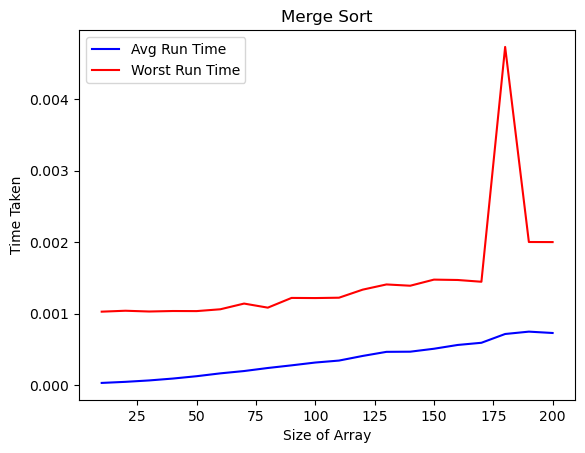

In [11]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Merge Sort") 

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()